In [189]:
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.max_rows', 100)

In [190]:
#track_record = pd.read_csv('track_record_count_150_powell_01.csv')
#track_record = pd.read_csv('experiments/track_record_count_200_powell_01_onlydates_with_bets_between80-20_all_time_serie.csv')
#track_record = pd.read_csv('experiments/main_callback.csv')
#track_record = pd.read_csv('experiments/parallel_onlydates_with_less_80_filter_top5.csv')
#track_record = pd.read_csv('experiments/parallel_all_series - Copia.csv')
#track_record = pd.read_csv('experiments/parallel_all_series.csv')
track_record = pd.read_csv('experiments/parallel_all_series_new_filter_test.csv')
#track_record = pd.read_csv('experiments/parallel_test.csv')
#track_record = pd.read_csv('just_a_test.csv')

#track_record['return2'] = track_record['return'].shift(fill_value=0)-1
#track_record['return2'] = track_record['return'] - 1
#track_record['return3'] = track_record['return'] + track_record['return'].shift(fill_value=0)-1
#track_record['return3'] = track_record['return'] + track_record['return'].shift(fill_value=0)-1
#track_record['return4'] = track_record['return2'].cumsum()

#set_inital = pd.DataFrame({'game_id': ["0000000"], "return": [1]})

#track_record = pd.concat([set_inital, track_record]).reset_index(drop=True)
#track_record['stake'] = track_record['return'].shift(fill_value=1)
#track_record['return_shifted'] = track_record['return'].shift(periods=-1)
track_record

,0,1,2,3,4,5
0,4396175,0.293698,5,2021-01-06,False,True
1,4396179,0.395181,5,2021-01-06,False,True
2,4396181,0.311356,5,2021-01-06,False,True
3,4396180,0.193256,5,2021-01-06,False,True
4,4396174,0.834584,5,2021-01-07,False,True
...,...,...,...,...,...,...
107,5168205,0.197712,5,2021-05-30,True,True
108,5168208,0.088528,5,2021-05-30,True,True
109,5168207,0.104752,5,2021-05-30,True,True
110,5168214,0.122058,5,2021-05-30,True,True


In [191]:
track_record.columns = ['game_id',	'return',	'n_bets',	'datetime',	'time_limit_flag', 'is_valid_solution']

In [192]:
#track_record = track_record[(track_record.datetime.apply(str)>"2021-01-01")&(track_record.datetime.apply(str)<"2022-01-01")]
#track_record = track_record[(track_record.datetime.apply(str)>"2021-01-01")]

In [193]:
track_record

,game_id,return,n_bets,datetime,time_limit_flag,is_valid_solution
0,4396175,0.293698,5,2021-01-06,False,True
1,4396179,0.395181,5,2021-01-06,False,True
2,4396181,0.311356,5,2021-01-06,False,True
3,4396180,0.193256,5,2021-01-06,False,True
4,4396174,0.834584,5,2021-01-07,False,True
...,...,...,...,...,...,...
107,5168205,0.197712,5,2021-05-30,True,True
108,5168208,0.088528,5,2021-05-30,True,True
109,5168207,0.104752,5,2021-05-30,True,True
110,5168214,0.122058,5,2021-05-30,True,True


In [194]:
#track_record = track_record[~(track_record['return'].isna())]

In [195]:
count_col = track_record.groupby(['datetime']).count().reset_index()['game_id']
is_valid_solution = track_record.groupby(['datetime']).any().reset_index()['is_valid_solution']

In [196]:
track_record = track_record.groupby(['datetime'])[['return', 'n_bets']].sum().reset_index()
track_record['count'] = count_col
track_record['is_valid_solution'] = is_valid_solution
track_record

,datetime,return,n_bets,count,is_valid_solution
0,2021-01-06,1.193491,20,4,True
1,2021-01-07,1.326231,15,3,True
2,2021-01-09,0.677180,10,2,True
3,2021-01-10,1.006133,28,6,True
4,2021-01-16,1.120706,10,2,True
5,2021-01-17,1.103195,30,6,True
6,2021-01-18,0.844104,10,2,True
7,2021-01-20,1.078925,20,4,True
8,2021-01-21,1.087467,24,5,True
9,2021-01-24,1.033715,40,8,True


In [197]:
print(track_record['return'].corr(track_record['count'], method='kendall'))
print(track_record['return'].corr(track_record['n_bets'],))

-0.14820319825847278
-0.4517274983524095


In [198]:
track_record.groupby(track_record.datetime.apply(lambda x: x[:4])).count()

,datetime,return,n_bets,count,is_valid_solution
datetime,,,,,
2021,29,29,29,29,29


In [199]:
track_record.groupby(['count', 'return']).size()

count  return  
2      0.677180    1
       0.775060    1
       0.844104    1
       0.970314    1
       1.015231    1
       1.027050    1
       1.065815    1
       1.072769    1
       1.094642    1
       1.096290    1
       1.120706    1
       1.151573    1
       1.167404    1
3      0.788927    1
       0.930377    1
       1.052692    1
       1.326231    1
4      0.983514    1
       1.078925    1
       1.193491    1
5      0.898076    1
       1.087467    1
6      1.006133    1
       1.103195    1
7      0.813672    1
       0.943771    1
8      0.986533    1
       1.033715    1
10     0.000000    1
dtype: int64

In [200]:
track_record.groupby('count')['return'].median()

count
2     1.065815
3     0.991535
4     1.078925
5     0.992771
6     1.054664
7     0.878722
8     1.010124
10    0.000000
Name: return, dtype: float64

In [201]:
print(track_record.shape)
track_record = track_record[track_record.is_valid_solution]
print(track_record.shape)

(29, 5)
(28, 5)


In [202]:
stake = [1]
current_stake = 1
percentage = 0.10
for i in track_record['return']:

    preserved_stake = current_stake * (1-percentage)
    bet_stake = current_stake*percentage
    current_stake = preserved_stake + bet_stake*i

    print(current_stake)

    stake.append(current_stake)

1.0193491420977268
1.0526035212174663
1.0186234103253082
1.019248147850326
1.0315511077160482
1.0421962402581626
1.025948810290025
1.034046104698457
1.0430905888908453
1.0466073460658474
1.0542234264005563
1.0718715698724235
1.0658445491782427
1.0759318625701497
1.074158047540912
1.0666794129706085
1.0769504542523602
1.0785907534442072
1.0558245786322216
1.061387977614882
1.0505698494117663
1.0664937006386725
1.069378560190938
1.0764167257931385
1.0563600983777564
1.0532241670701195
1.029532902435351
1.0281463994224858


In [203]:
track_record.shape

(28, 5)

In [204]:
len(stake)

29

In [205]:
my_df = pd.DataFrame({'date': ['0'] + list(track_record.datetime),
                      'return': [0] + list(track_record['return']),
                      'count': [0] + list(track_record['count']),
                      'n_bets': [0] + list(track_record.n_bets),
                      'stake':stake})
my_df


,date,return,count,n_bets,stake
0,0,0.000000,0,0,1.000000
1,2021-01-06,1.193491,4,20,1.019349
2,2021-01-07,1.326231,3,15,1.052604
3,2021-01-09,0.677180,2,10,1.018623
4,2021-01-10,1.006133,6,28,1.019248
5,2021-01-16,1.120706,2,10,1.031551
6,2021-01-17,1.103195,6,30,1.042196
7,2021-01-18,0.844104,2,10,1.025949
8,2021-01-20,1.078925,4,20,1.034046
9,2021-01-21,1.087467,5,24,1.043091


In [206]:
my_df[my_df.stake == my_df.stake.max()]

,date,return,count,n_bets,stake
18,2021-02-10,1.015231,2,10,1.078591


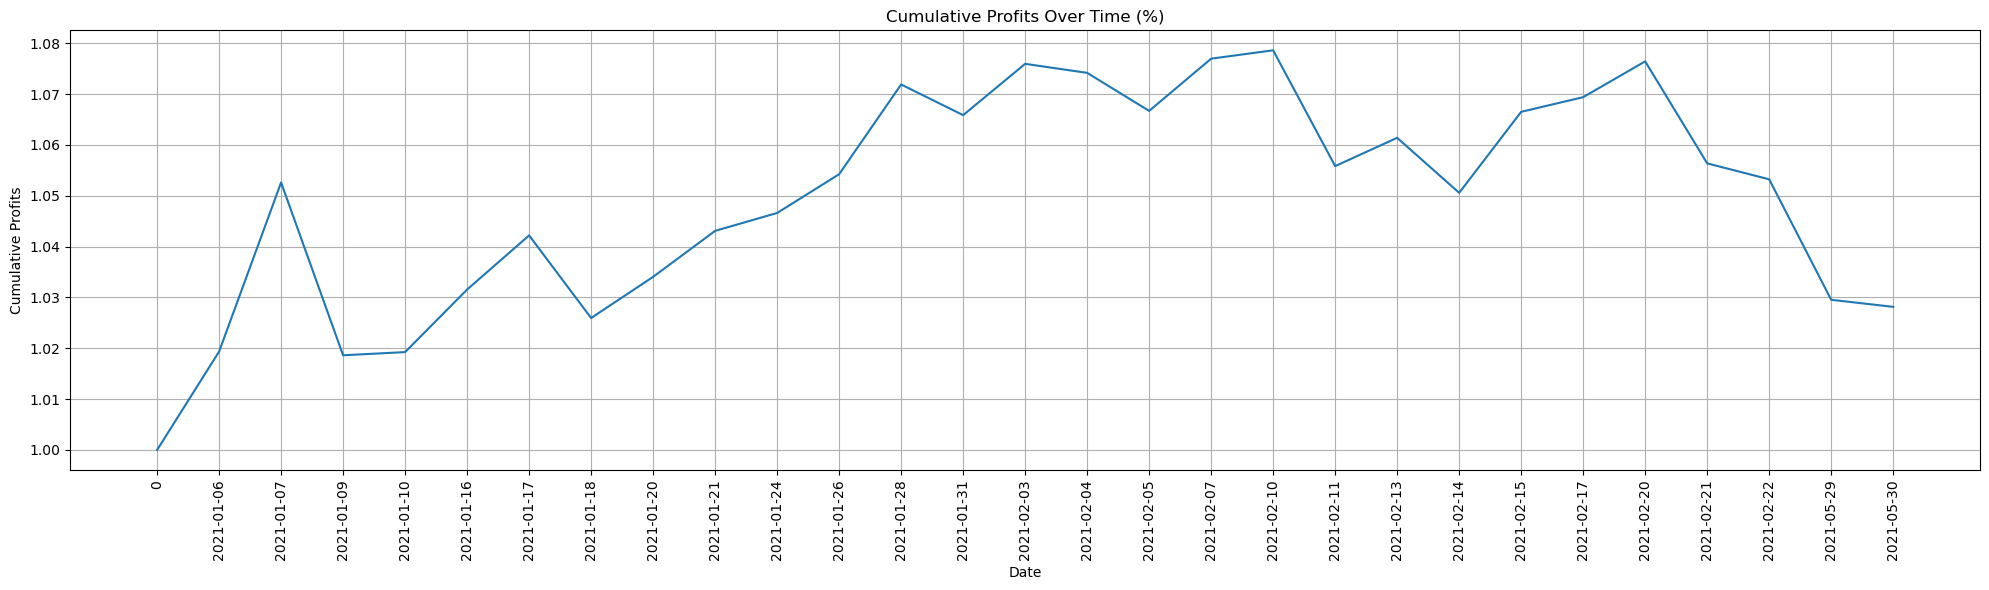

In [207]:
# Create a line plot
plt.figure(figsize=(20, 6))
plt.plot(['0'] + list(track_record.datetime), stake, linestyle='-')
plt.title('Cumulative Profits Over Time (%)')
plt.xlabel('Date')
plt.ylabel('Cumulative Profits')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()